In [0]:
from fastai.vision import *

In [0]:
import pandas as pd

df1 = pd.read_csv("Chrysler Building.csv", header = None, usecols= [0])
df1 = df1[df1[0].str.contains('http')]
len(df1)

647

In [0]:
import requests 
from requests.exceptions import ConnectionError
from requests.exceptions import SSLError

#requests.packages.urllib3.disable_warnings()
for i in range(len(df1)):
    file_url = df1[:][0].iloc[i]
    print(file_url)
    if 'loopnet' in file_url:
      pass
    else:
      try:
        r = requests.get(file_url,verify =True)
        with open("data/Chrysler Building/"+ "%.5d"%(i) + ".jpeg",'wb') as f:
          f.write(r.content) 
        
      except ConnectionError:
        pass
#       r = requests.get(file_url, verify=False)
#       with open("data/Empire State Building/"+ "%.5d"%(i) + ".jpeg",'wb') as f:
#         f.write(r.content) 
      except SSLError:
        pass
    
      finally:
        pass
   
  

In [0]:
!mkdir data/"One World Trade Center"

In [0]:
!rm -rf data/"One World Trade Center"

In [0]:
classes = ['Chrysler Building','Empire State Building','One World Trade Center']

In [0]:
for c in classes:
    print(c)
    verify_images('data/'+c, delete=True, max_size=750)

Chrysler Building


Empire State Building


One World Trade Center


In [0]:
path = 'data' 

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=524, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Chrysler Building', 'Empire State Building', 'One World Trade Center']

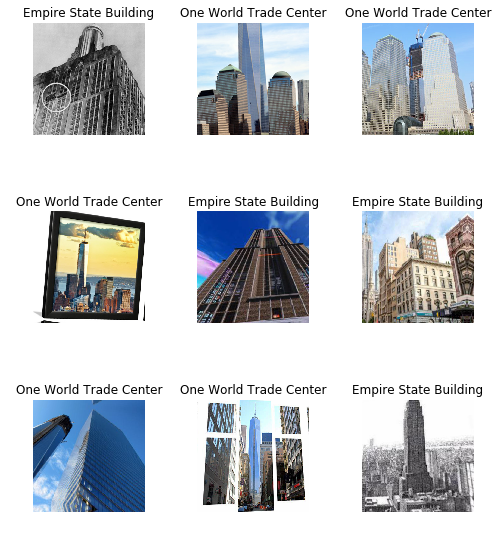

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn =  cnn_learner(data, models.resnet34, metrics = accuracy)

In [0]:
bs=16

In [0]:
learn.fit_one_cycle(9)

epoch,train_loss,valid_loss,accuracy,time
0,0.913616,0.766912,0.653646,01:17
1,0.854800,0.740991,0.690104,01:16
2,0.783668,0.680393,0.713542,01:15
3,0.708245,0.684847,0.705729,01:15
4,0.647321,0.654940,0.739583,01:15
5,0.597038,0.635703,0.742188,01:16
6,0.547657,0.628431,0.739583,01:14
7,0.515201,0.621070,0.750000,01:14
8,0.493570,0.617382,0.757812,01:13


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


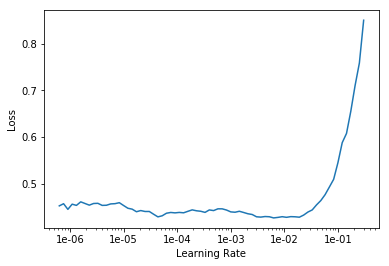

In [0]:
learn.recorder.plot()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

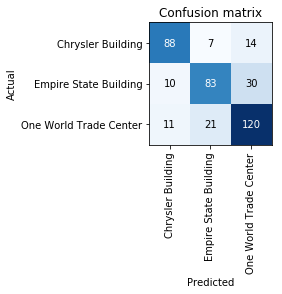

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder('data')
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
learn.save('stage-2')

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, 'data')